## Binary classification problem

### Dataset :

We study first a binary classification problem, performed by a neural network. Each input has two real features, and the output can be only 0 or 1. The training set contains 4000 examples, and the validation set, 1000.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Display figures on jupyter notebook
%matplotlib inline

In [2]:
# Define a function to generate the dataset, in the form of two interlaced spirals
def spiral(phi):
    x = (phi+1)*torch.cos(phi)
    y = phi*torch.sin(phi)
    return torch.cat((x, y), dim=1)

def generate_data(num_data):
    angles = torch.empty((num_data, 1)).uniform_(0, 10)
    data = spiral(angles)
    # add some noise to the data
    data += torch.empty((num_data, 2)).normal_(0.0, 0.3)
    labels = torch.zeros((num_data,), dtype=torch.int)
    # flip half of the points to create two classes
    data[num_data//2:,:] *= -1
    labels[num_data//2:] = 1
    return data, labels

In [3]:
# Generate the training set with 4000 examples by function generate_data

X_train, y_train = generate_data(4000)
X_train.size()

torch.Size([4000, 2])

In [4]:
# Define the vis_data function to visualize the dataset
def vis_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.plot(X[y==1, 0], X[y==1, 1], 'r+') #Examples are represented as red plusses for label 1
    plt.plot(X[y==0, 0], X[y==0, 1], 'b+') #Examples are represented as blue plusses for label 0 

We can now invoke the `vis_data` function on the dataset previously generated to see what it looks like:

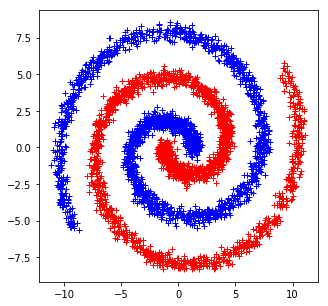

In [5]:
vis_data(X_train, y_train) # visualize training set

We use the `TensorDataset` wrapper from pytorch, so that the framework can easily understand our tensors as a proper dataset.

In [6]:
from torch.utils.data import TensorDataset, DataLoader
training_set = TensorDataset(X_train, y_train)

###  Training the model with a neural network

Here is a skeleton of a neural network with a single layer (thus: a linear classifier). This is the model you'll work on to improve it during this exercise.

Look at the code and run it to see the structure, then follow the questions below to iteratively improve the model.

In [7]:
import torch.nn as nn
import torch.nn.functional as F

At the first step, we define a neural network with just one layer. A useful tutorial for constructing model can be found [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).

In [275]:
class Model1(nn.Module):
    
    def __init__(self):
        super(Model1, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, 1)
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate
        activation = F.relu
        return activation(self.l1(inputs))
    
class Model2(nn.Module):
    
    def __init__(self):
        super(Model2, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,1)
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate
        activation = F.relu
        return self.l2(activation(self.l1(inputs)))
    
class Model3(nn.Module):
    
    def __init__(self):
        super(Model3, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [231]:
# Basic network structure with a single layer
import torch.nn.functional as F
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        # A single linear layer
        # The model has 2 inputs (the coordinates of the point) and an output (the prediction)
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        # We want the model to predict 0 for one class and 1 for the other class
        # A Sigmoid activation function seems appropriate
        activation = F.relu
        x = activation(self.l1(inputs))
        x = activation(self.l2(x))
        return self.l3(x)

In [232]:
# Create the model: 
model = Model()

# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Training the defined model
More information can be found [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).

In [210]:
# define a function for training
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    train_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (X_batch, y_real) in train_loader:
            y_pre = model(X_batch).view(-1)
            loss = criterion(y_pre, y_real.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(dataset)
        train_error.append(epoch_average_loss)
        print('Epoch [{}/{}], Loss: {:.4f}'
                      .format(epoch+1, num_epochs, epoch_average_loss))
    return train_error

In [211]:
train_error = train(num_epochs, batch_size, criterion, optimizer, model, training_set)

Epoch [1/10], Loss: 0.2475
Epoch [2/10], Loss: 0.2185
Epoch [3/10], Loss: 0.1996
Epoch [4/10], Loss: 0.1714
Epoch [5/10], Loss: 0.1486
Epoch [6/10], Loss: 0.1233
Epoch [7/10], Loss: 0.1015
Epoch [8/10], Loss: 0.0744
Epoch [9/10], Loss: 0.0542
Epoch [10/10], Loss: 0.0407


Text(0.5,1,'Visualization of convergence')

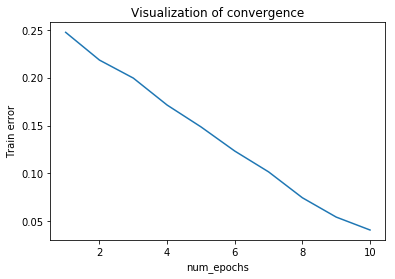

In [212]:
# plot the training error wrt. the number of epochs: 
plt.plot(range(1, num_epochs+1), train_error)
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")

#### Evaluate the model on the validation set

In [213]:
# Generate 1000 validation data:
X_val, y_val = generate_data(1000)

In [214]:
# predict labels for validation set
model.eval() # set the model to test mode
with torch.no_grad():
    y_pre = model(X_val).view(-1)

In [215]:
# Calculate the accuracy on validation set to evaluate the model by the function accuracy
def accuracy(y_real, y_pre):
    y_pre[y_pre<0.5] = 0.
    y_pre[y_pre>=0.5] = 1.
    
    acc = 1 - torch.sum(torch.abs(y_pre - y_real.float()))/len(y_pre)
    print('Accuracy of the network on the 1000 validation data: {:.2f} %'.format(acc.item()*100))

In [216]:
accuracy(y_val, y_pre)

Accuracy of the network on the 1000 validation data: 99.70 %


In [397]:
# Compare the prediction with real labels

def compare_pred(X, y_real, y_pre):
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(X[y_real==1, 0], X[y_real==1, 1], 'r+') #Examples are represented as a red plusses for label 1
    plt.plot(X[y_real==0, 0], X[y_real==0, 1], 'b+') #Examples are represented as a blue plusses for label 0
    plt.title("real data")

    plt.subplot(122)
    plt.plot(X[y_pre==1, 0], X[y_pre==1, 1], 'r+')
    plt.plot(X[y_pre==0, 0], X[y_pre==0, 1], 'b+')
    plt.title("prediciton results")

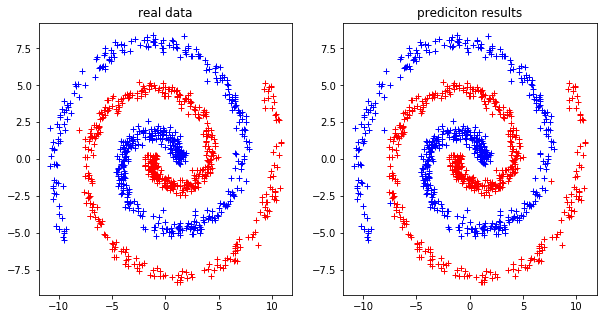

In [218]:
compare_pred(X_val, y_val, y_pre)

### Exercise 1: Impact of the architecture of the model

The class `Model` is the definition of your model. You can now modify it to try out different architectures and
see the impact of the following factors:

* Try to add more layers (1, 2, 3, more ?)
* Try to different activation functions ([sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.)
* Try to change the number of neurons for each layer (5, 10, 20, more ?)

#### Number of layers

In [280]:
# Create the model: 
models = [Model1(), Model2(), Model3()]
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(m.parameters(), lr=0.01) for m in models]

In [281]:
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for m,optimizer in zip(models,optimizers)]

Epoch [1/10], Loss: 0.3601
Epoch [2/10], Loss: 0.2456
Epoch [3/10], Loss: 0.2458
Epoch [4/10], Loss: 0.2466
Epoch [5/10], Loss: 0.2443
Epoch [6/10], Loss: 0.2453
Epoch [7/10], Loss: 0.2428
Epoch [8/10], Loss: 0.2461
Epoch [9/10], Loss: 0.2438
Epoch [10/10], Loss: 0.2440
Epoch [1/10], Loss: 1.1807
Epoch [2/10], Loss: 0.3180
Epoch [3/10], Loss: 0.2795
Epoch [4/10], Loss: 0.2738
Epoch [5/10], Loss: 0.2536
Epoch [6/10], Loss: 0.2488
Epoch [7/10], Loss: 0.2297
Epoch [8/10], Loss: 0.2177
Epoch [9/10], Loss: 0.2068
Epoch [10/10], Loss: 0.2012
Epoch [1/10], Loss: 0.2592
Epoch [2/10], Loss: 0.2317
Epoch [3/10], Loss: 0.2177
Epoch [4/10], Loss: 0.2036
Epoch [5/10], Loss: 0.1832
Epoch [6/10], Loss: 0.1682
Epoch [7/10], Loss: 0.1497
Epoch [8/10], Loss: 0.1299
Epoch [9/10], Loss: 0.1032
Epoch [10/10], Loss: 0.0815


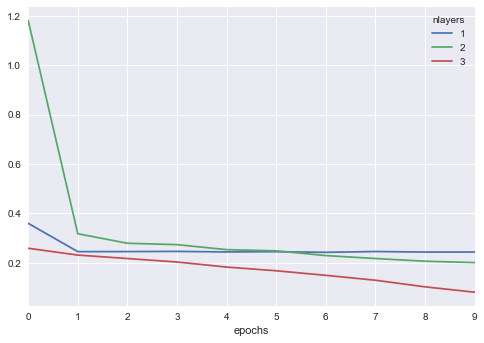

In [287]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns='1 2 3'.split())
errs.columns.names = "nlayers".split()
errs.index.names = "epochs".split()
errs.plot()

In [288]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

In [289]:
accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 61.30 %
Accuracy of the network on the 1000 validation data: 69.10 %
Accuracy of the network on the 1000 validation data: 93.70 %


Improvement of accuracy is significant when we add layers to the network (with non linearity!)

#### Activation functions

In [314]:
class ModelRelu(nn.Module):
    def __init__(self):
        super(ModelRelu, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))
    
class ModelTanh(nn.Module):
    def __init__(self):
        super(ModelTanh, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = torch.tanh
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))
    
class ModelSig(nn.Module):
    def __init__(self):
        super(ModelSig, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = torch.sigmoid
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [315]:
# Create the model: 
models = [ModelRelu(), ModelTanh(), ModelSig()]
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(m.parameters(), lr=0.01) for m in models]

In [316]:
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for m,optimizer in zip(models,optimizers)]

Epoch [1/10], Loss: 0.2587
Epoch [2/10], Loss: 0.2273
Epoch [3/10], Loss: 0.2146
Epoch [4/10], Loss: 0.1969
Epoch [5/10], Loss: 0.1735
Epoch [6/10], Loss: 0.1399
Epoch [7/10], Loss: 0.1044
Epoch [8/10], Loss: 0.0815
Epoch [9/10], Loss: 0.0631
Epoch [10/10], Loss: 0.0529
Epoch [1/10], Loss: 0.2571
Epoch [2/10], Loss: 0.2344
Epoch [3/10], Loss: 0.2266
Epoch [4/10], Loss: 0.2194
Epoch [5/10], Loss: 0.2112
Epoch [6/10], Loss: 0.2005
Epoch [7/10], Loss: 0.1924
Epoch [8/10], Loss: 0.1805
Epoch [9/10], Loss: 0.1735
Epoch [10/10], Loss: 0.1714
Epoch [1/10], Loss: 0.2484
Epoch [2/10], Loss: 0.2490
Epoch [3/10], Loss: 0.2450
Epoch [4/10], Loss: 0.2439
Epoch [5/10], Loss: 0.2460
Epoch [6/10], Loss: 0.2465
Epoch [7/10], Loss: 0.2449
Epoch [8/10], Loss: 0.2475
Epoch [9/10], Loss: 0.2454
Epoch [10/10], Loss: 0.2441


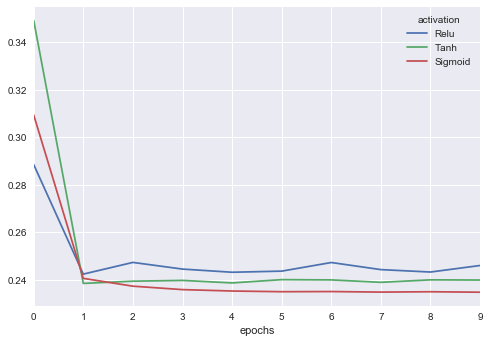

In [300]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns='Relu Tanh Sigmoid'.split())
errs.columns.names = "activation".split()
errs.index.names = "epochs".split()
errs.plot()

For baseline single layer network sigmoid activation function seems to be marginally better, however when we make the network more complex like 3 layers, then ReLU function gives significantly better accuracy.

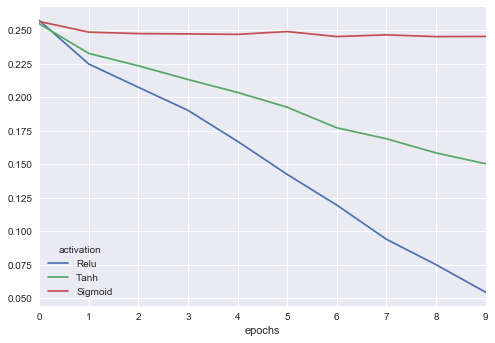

In [304]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns='Relu Tanh Sigmoid'.split())
errs.columns.names = "activation".split()
errs.index.names = "epochs".split()
errs.plot()

In [317]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 98.90 %
Accuracy of the network on the 1000 validation data: 81.60 %
Accuracy of the network on the 1000 validation data: 60.80 %


### number of neurons

In [307]:
class ModelLow(nn.Module):
    def __init__(self):
        super(ModelLow, self).__init__()
        self.l1 = nn.Linear(2, 5)
        self.l2 = nn.Linear(5,5)
        self.l3 = nn.Linear(5,1)
        
    def forward(self, inputs):
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))
    
class ModelMed(nn.Module):
    def __init__(self):
        super(ModelMed, self).__init__()
        self.l1 = nn.Linear(2, 20)
        self.l2 = nn.Linear(20,20)
        self.l3 = nn.Linear(20,1)
        
    def forward(self, inputs):
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))
    
class ModelHigh(nn.Module):
    def __init__(self):
        super(ModelHigh, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [308]:
# Create the model: 
models = [ModelLow(), ModelMed(), ModelHigh()]
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(m.parameters(), lr=0.01) for m in models]

In [309]:
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for m,optimizer in zip(models,optimizers)]

Epoch [1/10], Loss: 0.2458
Epoch [2/10], Loss: 0.2375
Epoch [3/10], Loss: 0.2364
Epoch [4/10], Loss: 0.2355
Epoch [5/10], Loss: 0.2353
Epoch [6/10], Loss: 0.2349
Epoch [7/10], Loss: 0.2348
Epoch [8/10], Loss: 0.2346
Epoch [9/10], Loss: 0.2345
Epoch [10/10], Loss: 0.2342
Epoch [1/10], Loss: 0.2554
Epoch [2/10], Loss: 0.2279
Epoch [3/10], Loss: 0.2214
Epoch [4/10], Loss: 0.2155
Epoch [5/10], Loss: 0.2092
Epoch [6/10], Loss: 0.1994
Epoch [7/10], Loss: 0.1873
Epoch [8/10], Loss: 0.1763
Epoch [9/10], Loss: 0.1603
Epoch [10/10], Loss: 0.1464
Epoch [1/10], Loss: 0.2520
Epoch [2/10], Loss: 0.2228
Epoch [3/10], Loss: 0.2039
Epoch [4/10], Loss: 0.1801
Epoch [5/10], Loss: 0.1524
Epoch [6/10], Loss: 0.1215
Epoch [7/10], Loss: 0.0940
Epoch [8/10], Loss: 0.0711
Epoch [9/10], Loss: 0.0532
Epoch [10/10], Loss: 0.0428


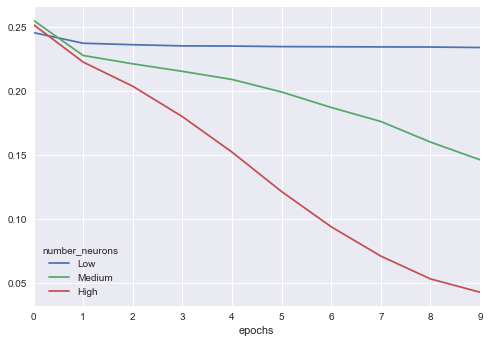

In [312]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns='Low Medium High'.split())
errs.columns.names = "number_neurons".split()
errs.index.names = "epochs".split()
errs.plot()

In [313]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 62.50 %
Accuracy of the network on the 1000 validation data: 85.20 %
Accuracy of the network on the 1000 validation data: 98.90 %


the higher the number of neurons the better the accuracy

### Exercise 2: Impact of the optimizer

Retrain the model by using different parameters of the optimizer, you can change its parameter in the cell initializing it, after the definition of your model.

* Use different batch size from 10 to 400
* Try different values of the learning rate (between 0.001 and 10), and see how these impact the trainig process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

**Note:** These changes may interact with your previous choices of architectures, and you may need to change them as well!

### batch_size

In [332]:
class Modeltmp(nn.Module):
    def __init__(self):
        super(Modeltmp, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = F.relu
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [339]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_sizes = [10,50,100,200,400]

# Create the model: 
models = [Modeltmp() for i in range(len(batch_sizes))]

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(model.parameters(), lr=0.01) for model in models]

import itertools
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for batch_size, m, optimizer in zip(batch_sizes,models,optimizers)]

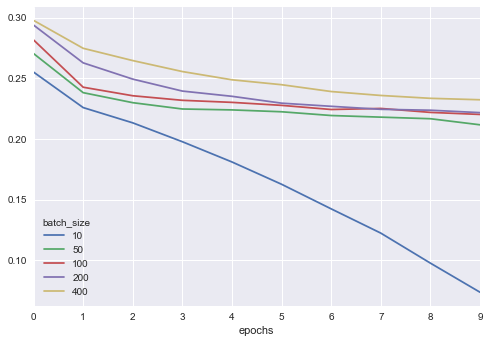

In [342]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns=batch_sizes)
errs.columns.names = "batch_size".split()
errs.index.names = "epochs".split()
errs.plot()

In [343]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 96.20 %
Accuracy of the network on the 1000 validation data: 64.30 %
Accuracy of the network on the 1000 validation data: 68.60 %
Accuracy of the network on the 1000 validation data: 66.10 %
Accuracy of the network on the 1000 validation data: 48.80 %


### learning rate

In [345]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

lrs = [0.001,0.01,0.1,1,10]
# Create the model: 
models = [Modeltmp() for i in range(len(lrs))]

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(model.parameters(), lr=lr) for model,lr in zip(models,lrs)]

import itertools
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for m, optimizer in zip(models,optimizers)]

Epoch [1/10], Loss: 0.2907
Epoch [2/10], Loss: 0.2529
Epoch [3/10], Loss: 0.2390
Epoch [4/10], Loss: 0.2308
Epoch [5/10], Loss: 0.2271
Epoch [6/10], Loss: 0.2244
Epoch [7/10], Loss: 0.2223
Epoch [8/10], Loss: 0.2216
Epoch [9/10], Loss: 0.2199
Epoch [10/10], Loss: 0.2191
Epoch [1/10], Loss: 0.2673
Epoch [2/10], Loss: 0.2272
Epoch [3/10], Loss: 0.2165
Epoch [4/10], Loss: 0.2019
Epoch [5/10], Loss: 0.1858
Epoch [6/10], Loss: 0.1674
Epoch [7/10], Loss: 0.1512
Epoch [8/10], Loss: 0.1368
Epoch [9/10], Loss: 0.1195
Epoch [10/10], Loss: 0.1068
Epoch [1/10], Loss: 0.4883
Epoch [2/10], Loss: 0.1728
Epoch [3/10], Loss: 0.1433
Epoch [4/10], Loss: 0.1252
Epoch [5/10], Loss: 0.1179
Epoch [6/10], Loss: 0.0991
Epoch [7/10], Loss: 0.0924
Epoch [8/10], Loss: 0.0838
Epoch [9/10], Loss: 0.0789
Epoch [10/10], Loss: 0.0709
Epoch [1/10], Loss: nan
Epoch [2/10], Loss: nan
Epoch [3/10], Loss: nan
Epoch [4/10], Loss: nan
Epoch [5/10], Loss: nan
Epoch [6/10], Loss: nan
Epoch [7/10], Loss: nan
Epoch [8/10], Loss:

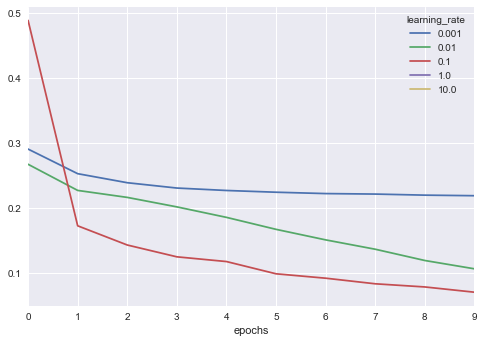

In [348]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.transpose(train_errors),columns=lrs)
errs.columns.names = "learning_rate".split()
errs.index.names = "epochs".split()
errs.plot()

- nans for "complex" models (3 layers + Relu activation function) when the learning rate gets too big

### number of epochs

In [354]:
# Choose the hyperparameters for training: 
num_epochs = [10,20,50,100]
batch_sizes = 10

# Create the model: 
models = [Modeltmp() for i in range(len(num_epochs))]

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizers = [torch.optim.SGD(model.parameters(), lr=0.01) for model in models]

import itertools
train_errors = [train(n, batch_size, criterion, optimizer, m, training_set)
                for n, m, optimizer in zip(num_epochs,models,optimizers)]

Epoch [1/10], Loss: 0.2569
Epoch [2/10], Loss: 0.2276
Epoch [3/10], Loss: 0.2146
Epoch [4/10], Loss: 0.1993
Epoch [5/10], Loss: 0.1793
Epoch [6/10], Loss: 0.1582
Epoch [7/10], Loss: 0.1329
Epoch [8/10], Loss: 0.1037
Epoch [9/10], Loss: 0.0835
Epoch [10/10], Loss: 0.0589
Epoch [1/20], Loss: 0.2642
Epoch [2/20], Loss: 0.2271
Epoch [3/20], Loss: 0.2084
Epoch [4/20], Loss: 0.1878
Epoch [5/20], Loss: 0.1664
Epoch [6/20], Loss: 0.1461
Epoch [7/20], Loss: 0.1249
Epoch [8/20], Loss: 0.1071
Epoch [9/20], Loss: 0.0998
Epoch [10/20], Loss: 0.0904
Epoch [11/20], Loss: 0.0749
Epoch [12/20], Loss: 0.0547
Epoch [13/20], Loss: 0.0558
Epoch [14/20], Loss: 0.0416
Epoch [15/20], Loss: 0.0379
Epoch [16/20], Loss: 0.0312
Epoch [17/20], Loss: 0.0267
Epoch [18/20], Loss: 0.0319
Epoch [19/20], Loss: 0.0204
Epoch [20/20], Loss: 0.0215
Epoch [1/50], Loss: 0.2600
Epoch [2/50], Loss: 0.2282
Epoch [3/50], Loss: 0.2129
Epoch [4/50], Loss: 0.1965
Epoch [5/50], Loss: 0.1801
Epoch [6/50], Loss: 0.1611
Epoch [7/50], Lo

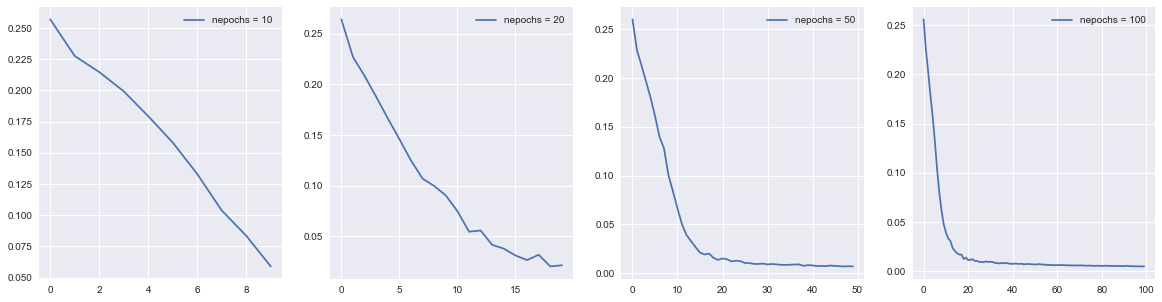

In [362]:
import pandas as pd
plt.style.use('seaborn')
f,ax = plt.subplots(ncols=len(train_errors),figsize=(20,5))
for i,err in enumerate(train_errors):
    ax[i].plot(err,label='nepochs = {}'.format(num_epochs[i]))
    ax[i].legend()

Convergence is achieved for nepochs = 50 or so so we should choose this value

### optimizer choice

In [370]:
# Choose the hyperparameters for training: 
num_epochs = 50
batch_sizes = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optims = [torch.optim.SGD,torch.optim.Adam,torch.optim.RMSprop,torch.optim.ASGD]
# Create the model: 
models = [Modeltmp() for i in range(len(optims))]

optimizers = [opt(model.parameters(), lr=0.01) for opt,model in zip(optims,models)]

import itertools
train_errors = [train(num_epochs, batch_size, criterion, optimizer, m, training_set)
                for m, optimizer in zip(models,optimizers)]

Epoch [1/50], Loss: 0.2580
Epoch [2/50], Loss: 0.2212
Epoch [3/50], Loss: 0.2072
Epoch [4/50], Loss: 0.1849
Epoch [5/50], Loss: 0.1585
Epoch [6/50], Loss: 0.1364
Epoch [7/50], Loss: 0.1194
Epoch [8/50], Loss: 0.0999
Epoch [9/50], Loss: 0.0842
Epoch [10/50], Loss: 0.0621
Epoch [11/50], Loss: 0.0531
Epoch [12/50], Loss: 0.0400
Epoch [13/50], Loss: 0.0302
Epoch [14/50], Loss: 0.0261
Epoch [15/50], Loss: 0.0227
Epoch [16/50], Loss: 0.0213
Epoch [17/50], Loss: 0.0189
Epoch [18/50], Loss: 0.0148
Epoch [19/50], Loss: 0.0150
Epoch [20/50], Loss: 0.0129
Epoch [21/50], Loss: 0.0131
Epoch [22/50], Loss: 0.0119
Epoch [23/50], Loss: 0.0131
Epoch [24/50], Loss: 0.0109
Epoch [25/50], Loss: 0.0100
Epoch [26/50], Loss: 0.0101
Epoch [27/50], Loss: 0.0111
Epoch [28/50], Loss: 0.0108
Epoch [29/50], Loss: 0.0095
Epoch [30/50], Loss: 0.0095
Epoch [31/50], Loss: 0.0091
Epoch [32/50], Loss: 0.0085
Epoch [33/50], Loss: 0.0085
Epoch [34/50], Loss: 0.0082
Epoch [35/50], Loss: 0.0074
Epoch [36/50], Loss: 0.0080
E

Text(0,0.5,'log(MSE)')

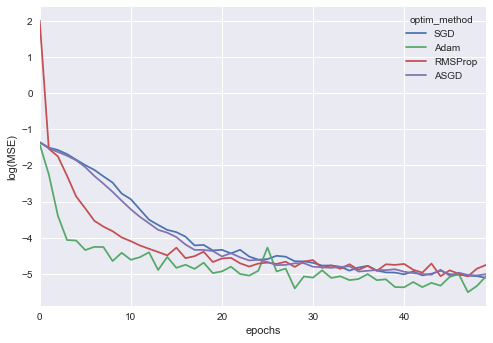

In [371]:
import pandas as pd
plt.style.use('seaborn')
errs = pd.DataFrame(np.log(np.transpose(train_errors)),columns='SGD Adam RMSProp ASGD'.split())
errs.columns.names = "optim_method".split()
errs.index.names = "epochs".split()
errs.plot()
plt.ylabel('log(MSE)')

Adam leads to faster convergence allegedly

In [372]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 100.00 %
Accuracy of the network on the 1000 validation data: 100.00 %
Accuracy of the network on the 1000 validation data: 99.80 %
Accuracy of the network on the 1000 validation data: 100.00 %


### Exercise 3: Impact of the loss function

The current model uses a mean square error (MSE) loss. While this loss can be used in this case, it is now rarely used for classification, and instead a Binary Cross Entropy (BCE) is used. It consists in interpreting the output of the network as the probability $p(y | x)$ of the point $x$ to belong to the class $y$, and in maximizing the probability to be correct for all samples $x$, that is, in maximizing $\displaystyle \prod_{(x,y) \in Dataset} p(y|x)$. Applying $-\log$ to this quantity, we obtain the following criterion to minimize:

$$ \sum_{(x,y) \in Dataset} - \log p(y | x) $$

This is implemented as such by the [BCELoss](https://pytorch.org/docs/stable/nn.html?highlight=bce#torch.nn.BCELoss) of pytorch. Note that this criterion requires its input to be a probability, i.e. in $[0,1]$, which requires the use of an appropriate activation function beforehand, e.g., a sigmoid.

It turns out that, for numerical stability reasons, it is better to incorporate this sigmoid and the BCELoss into a single function; this is done by the [BCEWithLogitsLoss](https://pytorch.org/docs/stable/nn.html?highlight=bcewithlogit#torch.nn.BCEWithLogitsLoss). Try to replace the MSE by this one and see how this changes the behavior in the network. This can also interact with the changes of the two previous exercices.

**Note:** As a consequence, when using the BCEWithLogitsLoss, the last layer of your network should not be followed by an activation function, as BCEWithLogitsLoss already adds a sigmoid.

In [382]:
class ModelLoss(nn.Module):
    def __init__(self):
        super(ModelLoss, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = torch.sigmoid
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [385]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_sizes = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterions = [nn.BCEWithLogitsLoss(),nn.MSELoss()]

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model

# Create the model: 
models = [ModelLoss() for i in range(len(criterions))]

optimizers = [torch.optim.Adam(model.parameters(), lr=0.01) for model in models]

import itertools
train_errors = [train(num_epochs, batch_size, loss, optimizer, m, training_set)
                for loss, m, optimizer in zip(criterions, models,optimizers)]

Epoch [1/10], Loss: 0.6778
Epoch [2/10], Loss: 0.6449
Epoch [3/10], Loss: 0.5578
Epoch [4/10], Loss: 0.4825
Epoch [5/10], Loss: 0.4390
Epoch [6/10], Loss: 0.3847
Epoch [7/10], Loss: 0.3295
Epoch [8/10], Loss: 0.2547
Epoch [9/10], Loss: 0.1051
Epoch [10/10], Loss: 0.0289
Epoch [1/10], Loss: 0.2554
Epoch [2/10], Loss: 0.2403
Epoch [3/10], Loss: 0.2363
Epoch [4/10], Loss: 0.2271
Epoch [5/10], Loss: 0.2145
Epoch [6/10], Loss: 0.1727
Epoch [7/10], Loss: 0.1354
Epoch [8/10], Loss: 0.0922
Epoch [9/10], Loss: 0.0413
Epoch [10/10], Loss: 0.0099


In [386]:
y_pres = []
for m in models:
    m.eval()
    with torch.no_grad():
        y_pres.append(m(X_val).view(-1))

accs = [accuracy(y_val, y_pre) for y_pre in y_pres]

Accuracy of the network on the 1000 validation data: 100.00 %
Accuracy of the network on the 1000 validation data: 99.80 %


Slightly better accuracy indeed but difficult to asses if significant since both perform very well

### Exercise 4: Prediction on test set

Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.

In [387]:
# Here is a test dataset. Use it similarly to the validaiton dataset above
# to compute the final performance of your model
X_test, y_test = generate_data(500)

Choices:
- 3 layers seems to be enough: 2 -> 100 -> 100 -> 1 neurons
- Sigmoid activation for BCE loss compatibility
- BCELogitloss
- lr = 0.01
- nepochs = 50
- batch_size = 10
- Adam optim

In [388]:
class ModelFinal(nn.Module):
    def __init__(self):
        super(ModelFinal, self).__init__()
        self.l1 = nn.Linear(2, 100)
        self.l2 = nn.Linear(100,100)
        self.l3 = nn.Linear(100,1)
        
    def forward(self, inputs):
        activation = torch.sigmoid
        return self.l3(activation(self.l2(activation(self.l1(inputs)))))

In [400]:
# Choose the hyperparameters for training: 
num_epochs = 50
batch_sizes = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.BCEWithLogitsLoss()

model = ModelFinal()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_errors = train(num_epochs, batch_size, criterion, optimizer, model, training_set)

Epoch [1/50], Loss: 0.6766
Epoch [2/50], Loss: 0.6546
Epoch [3/50], Loss: 0.6368
Epoch [4/50], Loss: 0.5729
Epoch [5/50], Loss: 0.4492
Epoch [6/50], Loss: 0.3369
Epoch [7/50], Loss: 0.1867
Epoch [8/50], Loss: 0.1151
Epoch [9/50], Loss: 0.0960
Epoch [10/50], Loss: 0.0763
Epoch [11/50], Loss: 0.0278
Epoch [12/50], Loss: 0.0148
Epoch [13/50], Loss: 0.0079
Epoch [14/50], Loss: 0.0078
Epoch [15/50], Loss: 0.0342
Epoch [16/50], Loss: 0.0048
Epoch [17/50], Loss: 0.0029
Epoch [18/50], Loss: 0.0022
Epoch [19/50], Loss: 0.0012
Epoch [20/50], Loss: 0.0009
Epoch [21/50], Loss: 0.0007
Epoch [22/50], Loss: 0.0006
Epoch [23/50], Loss: 0.0004
Epoch [24/50], Loss: 0.0003
Epoch [25/50], Loss: 0.0003
Epoch [26/50], Loss: 0.0002
Epoch [27/50], Loss: 0.0484
Epoch [28/50], Loss: 0.0011
Epoch [29/50], Loss: 0.0008
Epoch [30/50], Loss: 0.0007
Epoch [31/50], Loss: 0.0006
Epoch [32/50], Loss: 0.0005
Epoch [33/50], Loss: 0.0004
Epoch [34/50], Loss: 0.0003
Epoch [35/50], Loss: 0.0003
Epoch [36/50], Loss: 0.0002
E

In [402]:
model.eval()
with torch.no_grad():
    y_pre = model(X_test).view(-1)

accuracy(y_test, y_pre)

Accuracy of the network on the 1000 validation data: 100.00 %


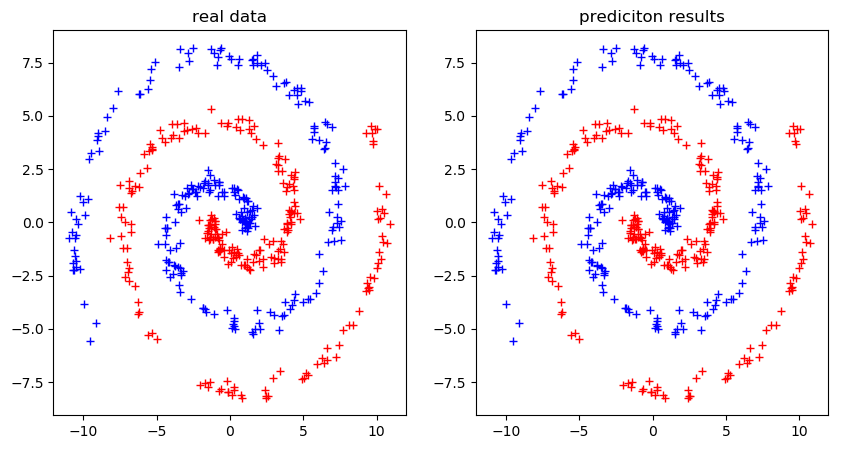

In [414]:
plt.style.use('default')
compare_pred(X_test, y_test, y_pre)